# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

## Шаг №1. Загрузите данные и подготовьте их к анализу

In [1]:
# Загрузим необходимые библиотеки
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузим данные и посомтрим общую информацию 
rest_data = pd.read_csv('C:\\Users\\C\\Desktop\\rest_data.csv')
display(rest_data.head(10))
rest_data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
# Проверим на наилчие дубликатов данные
print(rest_data.duplicated().sum())

0


## Вывод
После изучени таблицы и информации о ней видно, что пропуски отсутствуют, тип данных в колонках корректный. Дубликаты не обнаружены.

## Шаг №2. Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

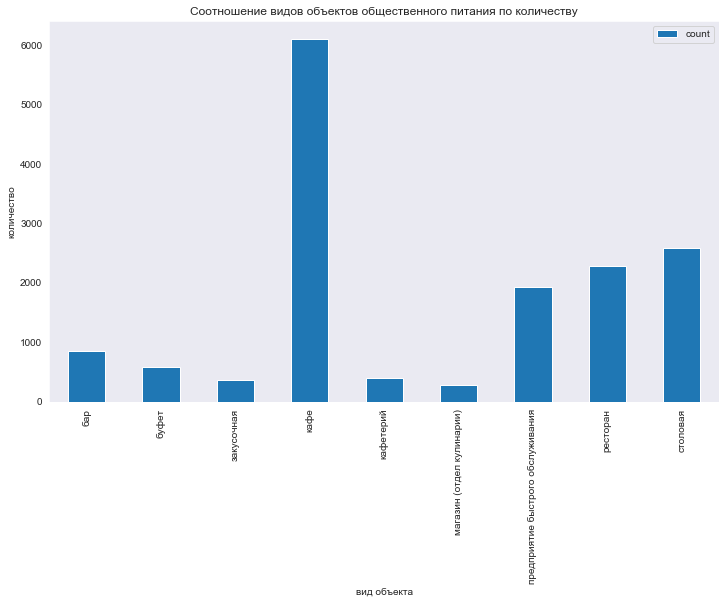

In [25]:
# посчитаем виды объектов
rest_data_vid = rest_data.groupby(['object_type']).agg({'object_type': 'count'})
rest_data_vid.columns = ['count'] # переминуем столбец


#построим график  видов объектов питания по кол-ву

rest_data_vid.plot(kind='bar', figsize=(12, 7), title='Cоотношение видов объектов общественного питания по количеству')
plt.xlabel('вид объекта')
plt.ylabel('количество')
plt.savefig('test_high_res.jpg', dpi = 200)

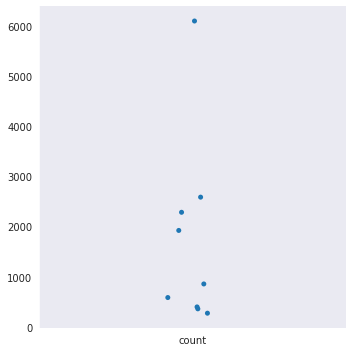

In [31]:
# посчитаем виды объектов
rest_data_vid = rest_data.groupby(['object_type']).agg({'object_type': 'count'})
rest_data_vid.columns = ['count'] # переминуем столбец

#построим график  видов объектов питания по кол-ву

sns.catplot(data=rest_data_vid)

#### Вывод
Из графика видно, что больше всего кафе. Рестораны, предприятия быстрого обслуживания, столовые практически одинаковое кол-во.

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

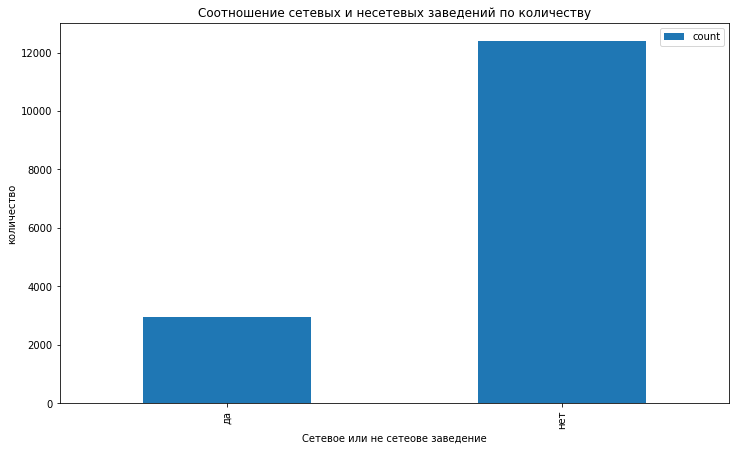

In [4]:
# посчитаем соотношение сетевых и не сетевых
rest_data_chain = rest_data.groupby(['chain']).agg({'chain': 'count'})
rest_data_chain.columns = ['count']

#построим график  видов объектов питания по кол-ву

rest_data_chain.plot(kind='bar', figsize=(12, 7), title='Cоотношение сетевых и несетевых заведений по количеству')
plt.xlabel('Сетевое или не сетеове заведение')
plt.ylabel('количество')
plt.savefig('test_high_res1.png', dpi = 300)

#### Вывод
Из графика видно, что не сетевых заведений значительно больше, чем сетевых.

### Для какого вида объекта общественного питания характерно сетевое распространение?

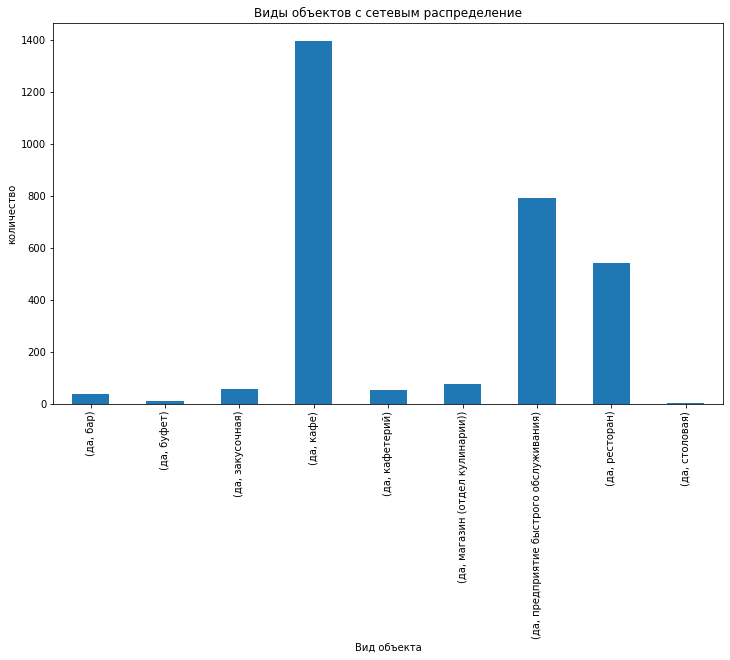

In [5]:
# сделаем срез из таблицы сетевых заведений
chain_yes = rest_data.query('chain == "да"')
chain_object = chain_yes.groupby(['chain', 'object_type'])['object_type'].count()

# построим график
chain_object.plot(title='Виды объектов с сетевым распределение', figsize=(12, 7), kind='bar')
plt.xlabel('Вид объекта')
plt.ylabel('количество')
plt.savefig('test_high_res2.png', dpi = 300)

#### Вывод
Из графика видно, что для кафе характерно сетеове распостранение.

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [8]:
# Посмотрим описательную статистику для сетевых заведений
print(chain_yes['number'].describe())

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64


In [7]:
#построим график числа посадочных мест по заведениям
fig = px.scatter(chain_yes, x='object_name', y='number', title="Число посадочных мест по сетевым заведениям")
fig.show()
plt.savefig('test_high_res3.png', dpi = 300)

<Figure size 432x288 with 0 Axes>

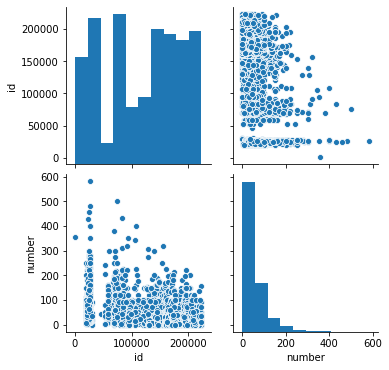

In [9]:
#построим график совместного распределения
sns.pairplot(chain_yes)

In [10]:
# Создадим таблицу с не сетевыми заведениями, для сравнения
chain_no = rest_data.query('chain == "нет"')
# Посмотрим описательную статистику для не сетевых заведений
chain_no['number'].describe()

count    12398.000000
mean        61.133731
std         78.284046
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

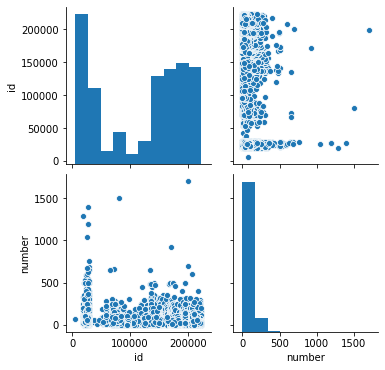

In [11]:
#построим график совместного распределения
sns.pairplot(chain_no)

In [12]:
fig = px.scatter(chain_no, x='object_name', y='number', title="Число посадочных мест по не сетевым заведениям")
fig.show()

#### Вывод
При рассмотрении сетевых и не сетевых заведений видно, что у них в большенстве случаев не превышает 100. 50 перцентиль одинаковый. От сюда можно сделать вывод, что для сетевых заведений характерно кол-во мест до ста и много заведений.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

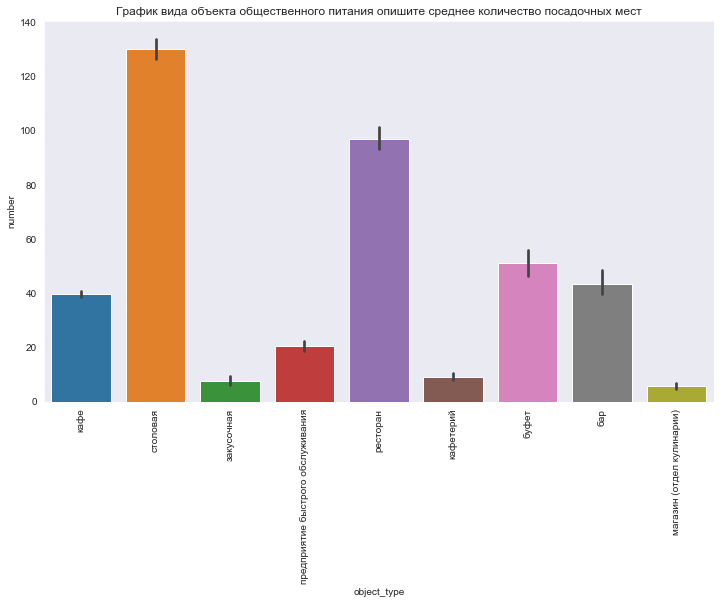

In [13]:
# Построим график
plt.figure(figsize=(12, 7))
sns.set_style("dark")
plt.title("График вида объекта общественного питания опишите среднее количество посадочных мест")
plot=sns.barplot(data=rest_data,  x="object_type", y="number")
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig('test_high_res3.png', dpi = 300)

#### Вывод
Самое большее кол-во мест в среднем предоставляют столовые и рестораны. Наименьшее закусочные и магазин (отдел кулинарии)

## Выделите в отдельный столбец информацию об улице из столбца address .

#### Для дальнейшего анализа нам понадобиться таблица со внешними данными: это район расположения заведения и информацию об улице.  Код получения таблицы будет закомменитрован и приложен в конце работы.

In [14]:
# подгрузим таблицу со внешними данными
from io import BytesIO
import requests 
spreadsheet_id = '1axupYKS7XU6xnwiRwRhmwfDxogeCofRlUbmtRO5dQUk'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
rd_new = pd.read_csv(BytesIO(r.content)) # rd_new = rest_data_new расшифровка названия таблицы
rd_new.head()

,Unnamed: 0,index,id,address,number,coords,street,district
0,0,7370,153560,"город Москва, проспект Андропова, дом 22",0,37.661913 55.682651,проспект андропова,район нагатино-садовники
1,1,6905,142200,"город Москва, улица Маршала Катукова, дом 11, ...",0,37.4046 55.810213,улица маршала катукова,район строгино
2,2,9853,170448,"город Москва, Южнобутовская улица, дом 97",0,37.520626 55.534444,южнобутовская улица,район южное бутово
3,3,9388,167660,"город Москва, Первомайская улица, дом 81",0,37.801574 55.793556,первомайская улица,район измайлово
4,4,9385,167620,"город Москва, Таганская улица, дом 32/1, строе...",0,37.664896 55.739483,таганская улица,таганский район


In [15]:
# Посмотрин информацию о таблице
rd_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15366 non-null  int64 
 1   index       15366 non-null  int64 
 2   id          15366 non-null  int64 
 3   address     15366 non-null  object
 4   number      15366 non-null  int64 
 5   coords      15333 non-null  object
 6   street      14965 non-null  object
 7   district    14926 non-null  object
dtypes: int64(4), object(4)
memory usage: 960.5+ KB


При получении таблицы rd_new около 3% строк не удалось получить данные. В целом данные пропуски не помешают анализу.

In [16]:
# Соединим таблицы rest_data и rd_new
rd_final = pd.merge(rest_data, rd_new, on=['id', 'address', 'number'])
rd_final.drop(['Unnamed: 0', 'index'], axis='columns', inplace=True) # удалим лишнии столбцы 'Unnamed: 0', 'index'
display(rd_final.head(10))

,id,object_name,chain,object_type,address,number,coords,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,37.714474 55.879005,улица егора абакумова,ярославский район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,37.673295 55.738307,улица талалихина,таганский район
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,37.669576 55.735571,абельмановская улица,таганский район
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,37.573007 55.892713,абрамцевская улица,район лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,37.572279 55.904074,абрамцевская улица,район лианозово
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,37.571525 55.906744,абрамцевская улица,район лианозово
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,37.598043 55.747388,переулок сивцев вражек,район арбат
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,37.715471 55.754882,авиамоторная улица,район лефортово
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,37.715471 55.754882,авиамоторная улица,район лефортово
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,37.715471 55.754882,авиамоторная улица,район лефортово


In [17]:
# Посмотрин информацию о таблице
rd_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15366 entries, 0 to 15365
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
 6   coords       15333 non-null  object
 7   street       14965 non-null  object
 8   district     14926 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


Посе соединения таблиц ничего не потерялось. 

## Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [18]:
#Посмотрим топ 10 заведений, и на каких улиах расположены
rd_final_top10 = (rd_final
                    .groupby(['street']).agg({'object_name': 'count'})
                    .sort_values(by='object_name', ascending=False)
                    .query('object_name > 109')
                    )
                 
print(rd_final_top10)

                        object_name
street                             
проспект мира                   204
профсоюзная улица               183
ленинградский проспект          173
пресненская набережная          167
варшавское шоссе                162
ленинский проспект              148
проспект вернадского            131
кутузовский проспект            114
каширское шоссе                 112
кировоградская улица            110


In [19]:
rd_final_top101 = rd_final.groupby(['street']).agg({'object_name': 'count'})
street_top10 = rd_final_top101.merge(rd_final, on='street')
street_top10 = street_top10.query('object_name_x > 109')
#sns.pairplot(street_top10, x='street', y='object_name_x')
display(street_top10.head())

,street,object_name_x,id,object_name_y,chain,object_type,address,number,coords,district
2157,варшавское шоссе,162,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,37.619683 55.699943,донской район
2158,варшавское шоссе,162,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,37.622405 55.700877,донской район
2159,варшавское шоссе,162,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,37.622432 55.693226,донской район
2160,варшавское шоссе,162,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,37.618758 55.656869,нагорный район
2161,варшавское шоссе,162,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,37.618812 55.646228,нагорный район


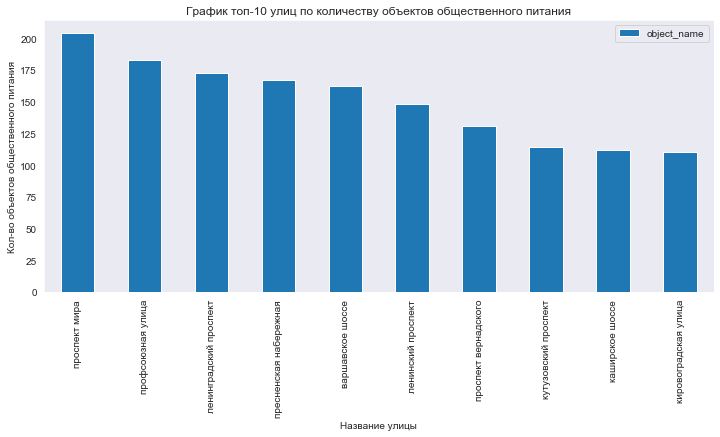

In [20]:
#построим график топ-10 улиц
rd_final_top10.plot(kind='bar', figsize=(12, 5), title='График топ-10 улиц по количеству объектов общественного питания')
plt.xlabel('Название улицы')
plt.ylabel('Кол-во объектов общественного питания')
plt.savefig('test_high_res4.png', dpi = 300)

In [22]:
rd_final_top10.index

Index(['проспект мира', 'профсоюзная улица', 'ленинградский проспект',
       'пресненская набережная', 'варшавское шоссе', 'ленинский проспект',
       'проспект вернадского', 'кутузовский проспект', 'каширское шоссе',
       'кировоградская улица'],
      dtype='object', name='street')

In [23]:
# Посмотрим в каких районах находятся топ-10 улиц по количеству объектов общественного питания.
street = ['проспект мира', 'профсоюзная улица', 'ленинградский проспект',
       'пресненская набережная', 'варшавское шоссе', 'ленинский проспект',
       'проспект вернадского', 'кутузовский проспект', 'каширское шоссе',
       'кировоградская улица'] #список ТОП-10 улиц
for i in street:
    print('----------------------------------------------------------')
    print('В каких районах находится', i)
    print()
    district = rd_final[rd_final['street'] == i]['district'].unique()
    print(district)
    

----------------------------------------------------------
В каких районах находится проспект мира

['мещанский район' 'останкинский район' 'алексеевский район'
 'район ростокино' 'район свиблово' 'ярославский район']
----------------------------------------------------------
В каких районах находится профсоюзная улица

['академический район' 'юго-западный административный округ'
 'район черёмушки' 'обручевский район' 'район коньково'
 'район тёплый стан' 'район ясенево']
----------------------------------------------------------
В каких районах находится ленинградский проспект

['район беговой' 'район аэропорт' 'район сокол' 'хорошёвский район']
----------------------------------------------------------
В каких районах находится пресненская набережная

['пресненский район']
----------------------------------------------------------
В каких районах находится варшавское шоссе

['донской район' 'нагорный район' 'район чертаново южное'
 'район чертаново северное' 'район чертаново централь

In [24]:
# Список районов для топ-10 улиц
print(street_top10['district'].unique())

['донской район' 'нагорный район' 'район чертаново южное'
 'район чертаново северное' 'район чертаново центральное'
 'район нагатино-садовники' 'район южное бутово'
 'район москворечье-сабурово' 'район орехово-борисово южное'
 'район орехово-борисово северное' 'район фили-давыдково'
 'район дорогомилово' 'район беговой' 'район аэропорт' 'район сокол'
 'хорошёвский район' 'район якиманка' 'гагаринский район'
 'ломоносовский район' 'обручевский район' 'район тропарёво-никулино'
 'район тёплый стан' 'район проспект вернадского' 'пресненский район'
 'западный административный округ' 'район раменки' 'мещанский район'
 'останкинский район' 'алексеевский район' 'район ростокино'
 'район свиблово' 'ярославский район' 'академический район'
 'юго-западный административный округ' 'район черёмушки' 'район коньково'
 'район ясенево']


Наибольшее кол-во объектов общественного питания находится на Проспекте мира. Улицы протяженные и они проходят через несколько районов города. 

## Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [25]:
# Найдем число улиц с одним объектом питания
rd_final_gr = rd_final.groupby(['street']).agg({'object_name': 'count'})
rd_final_one = rd_final_gr.query('object_name == 1')
street_count = rd_final_one['object_name'].count()         
print('Число улиц с одним заведением общественного питания:', street_count)

Число улиц с одним заведением общественного питания: 560


In [26]:
# Найдем районы Москвы в которых расположены улицы с одним объектом общественного питния
district_one = rd_final_one.merge(rd_final, on='street')
display(district_one.head())
print()
print('Список районов Москвы в которых расположены улицы с одним объектом общественного питния:')
print()
print(district_one['district'].unique())

,street,object_name_x,id,object_name_y,chain,object_type,address,number,coords,district
0,1-й балтийский переулок,1,22139,ХуанХэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,37.518785 55.810471,район аэропорт
1,1-й басманный переулок,1,152133,Столовая института мировых цивилизаций,нет,столовая,"город Москва, 1-й Басманный переулок, дом 3, с...",50,37.662838 55.770785,красносельский район
2,1-й ботанический проезд,1,21527,Буфет при ГУП «Объединенный комбинат школьно п...,нет,столовая,"город Москва, 1-й Ботанический проезд, дом 2",40,37.635979 55.850707,район свиблово
3,1-й вешняковский проезд,1,28085,Столовая ГНУ ВИЭСХ,нет,столовая,"город Москва, 1-й Вешняковский проезд, дом 2, ...",20,37.78792 55.724312,рязанский район
4,1-й голутвинский переулок,1,146400,Шелби,нет,кафе,"город Москва, 1-й Голутвинский переулок, дом 6",22,37.613494 55.7396,район якиманка



Список районов Москвы в которых расположены улицы с одним объектом общественного питния:

['район аэропорт' 'красносельский район' 'район свиблово'
 'рязанский район' 'район якиманка' nan 'район хамовники'
 'район соколиная гора' 'даниловский район' 'южный административный округ'
 'таганский район' 'район лефортово' 'район печатники' 'район сокольники'
 'район замоскворечье' 'хорошёвский район' 'район арбат'
 'район марьина роща' 'алексеевский район' 'район текстильщики'
 'район ростокино' 'район раменки' 'район хорошёво-мнёвники'
 'район покровское-стрешнево' 'посёлок ватутинки' 'район богородское'
 'нижегородский район' 'тверской район' 'лосиноостровский район'
 'район преображенское' 'район ново-переделкино'
 'район северное измайлово' 'район восточное измайлово' 'район беговой'
 'донской район' 'район гольяново' 'войковский район' 'савёловский район'
 'район измайлово' 'район перово' 'район филёвский парк'
 'район чертаново южное' 'южнопортовый район' 'головинский район'
 'район ю

В Москве всего 560 улиц с одним объектом общественного питания.

## Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

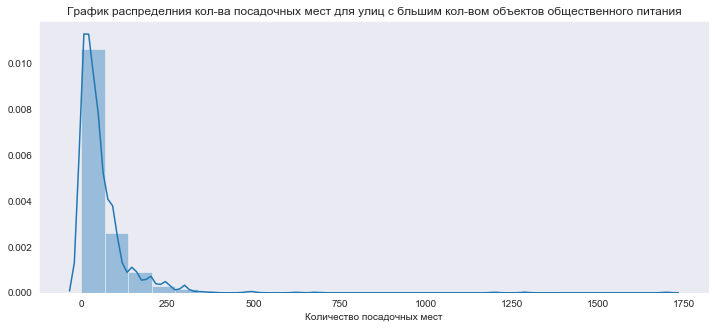

In [22]:
# Построим диаграмму распределения
sns.set_style("dark")
plt.figure(figsize=(12, 5))
sns.distplot(street_top10['number'], bins=25)
plt.title('График распределния кол-ва посадочных мест для улиц с бльшим кол-вом объектов общественного питания')
plt.xlabel('Количество посадочных мест')
plt.savefig('test_high_res5.png', dpi = 300)

In [28]:
street_top10['number'].describe()

count    1504.000000
mean       57.943484
std        90.012604
min         0.000000
25%        12.000000
50%        38.500000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

Основная закономерность, то что количество мест в срднем 39. Заведения с большим кол-вом мест не преобладает, а занчительно уступает. 

## Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

Из данных видно, что более всего распространённый объект общественного питания это кафе. Рестораны, предприятия быстрого обслуживания, столовые практически одинаково распространены. Сетевые заведения не рапостранены. Сетевые кафе наиболее распространены по городу. Для всех завдений характерно кол-во мест для гостей до 50. Самое большее кол-во мест в среднем предоставляют столовые и рестораны. Наименьшее закусочные и магазин (отдел кулинарии). Наибольшее кол-во объектов общественного питания находится на Проспекте мира. В Москве всего 560 улиц с одним объектом общественного питания.

Думаю лучше всего сделать заведение в виде кафе с посадочными местами порядка 25-40 мест. Расположить кафе лучше в туристических районах. Например: Пресненский, Алексеевский , Останкинский,  районы.  Сетевые заведения не распространены,  исходя из данных. Но я думаю не большую сеть в центральных районах города можно организовать и на туристических маршрутах.

## Шаг №3. Подготовка презентации

## Приложение

In [29]:
#import pandas as pd
#import requests
#from bs4 import BeautifulSoup
#import json

#rest_data = pd.read_csv('C:\\Users\\C\\Desktop\\rest_data.csv')
#display(rest_data.head())

#rest_data.drop(['object_name', 'chain', 'object_type'], axis='columns', inplace=True)
#rest_data = rest_data.sort_values(by ='number', inplace=False).reset_index()

# Создадим таблицу для теста парсинга.
#rest_data.tail(20)
#data = rest_data.query('585 < number < 675')
#data 


#С парсим координаты домов, где расположены объекты общественного питнаия

#def get_district(coords):
#    paramr = {'geocode': coords}  
#    r_rr = requests.get("https://geocode-maps.yandex.ru/1.x/?apikey=&", 
#                     params=paramr)
#    soup_r = BeautifulSoup(r_rr.text.lower(), 'lxml')
#    street_r = soup_r.find_all('dependentlocalityname')
#    ryon_r = street_r[1].text
#    return ryon_r

#rest_data['district'] = rest_data['coords'].apply(get_district)
#display(rest_data.head())

#С парсим название улиц, где расположены объекты общественного питнаия

#def get_street(address):
#    params = {'geocode':address}  
#    r_s = requests.get("https://geocode-maps.yandex.ru/1.x/?apikey=&format=xml&", 
#                     params=params) 
#    soup_s=BeautifulSoup(r_s.text.lower(), 'lxml')
#    street = soup_s.find_all('thoroughfarename')
#    for row in street:
#        return row.text

    
#rest_data['street'] = rest_data['address'].apply(get_street)
#display(rest_data.head())

#С парсим название района, где расположены объекты общественного питнаия


#def get_district(coords):
 #   try:
 #       param = {'geocode': coords}  
 #       r_rr = requests.get("https://geocode-maps.yandex.ru/1.x/?apikey=&", 
 #                   params=param)
  #      soup_r = BeautifulSoup(r_rr.text.lower(), 'lxml')
 #       street_r = soup_r.find_all('dependentlocalityname')
 #       ryon_r = street_r[1].text
 #       return ryon_r
 #   except:
  #     
    

#rest_data['district'] = rest_data['coords'].apply(get_district)
#display(rest_data.head())

# Сохраним полученую таблицу

#rest_data.to_csv('rest.csv')

